## use kmeans clustering on a customer dat set with three colums 
"CustomerID,Annual Income (k$),Spending Score (1-100)"

In [2]:
%pip install -q -U scikit-learn matplotlib numpy pandas seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [5]:
# load dataset

df = pd.read_csv('dataset/customer_data_records.csv')
print(df.head())
df.info()



   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              174 non-null    int64
 1   Annual Income (k$)      174 non-null    int64
 2   Spending Score (1-100)  174 non-null    int64
dtypes: int64(3)
memory usage: 4.2 KB


In [ ]:
# select features for clustering
features = df.iloc[:, 1:3]  
features.head()

,Annual Income (k$),Spending Score (1-100)
0,117,20
1,107,59
2,29,36
3,121,19
4,86,90


In [12]:
# clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)    
# add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster
0,1,117,20,0
1,2,107,59,0
2,3,29,36,1
3,4,121,19,0
4,5,86,90,1


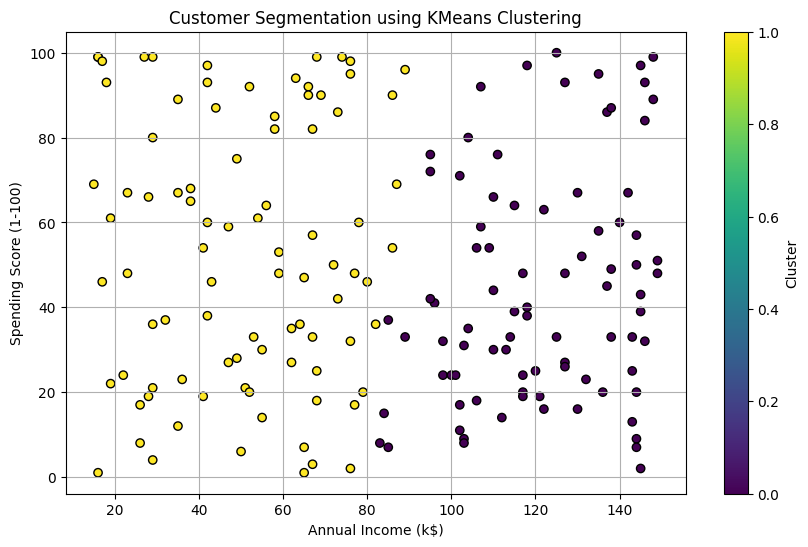

In [11]:
#visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('Customer Segmentation using KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

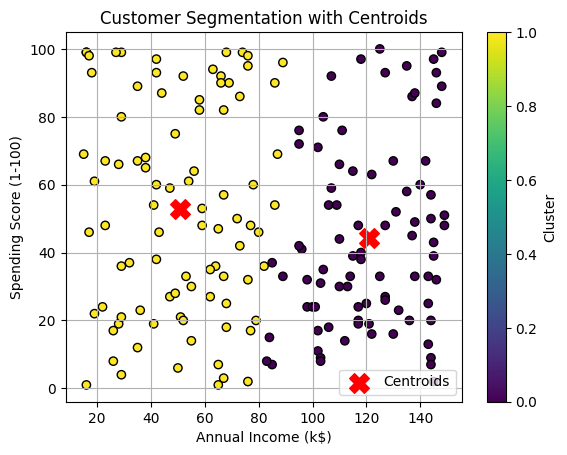

In [13]:
# using centroids
centroids = kmeans.cluster_centers_
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segmentation with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()  